### ***Examining the dataset***

Throughout this course, you'll be analyzing a dataset of traffic stops in Rhode Island that was collected by the [Stanford Open Policing Project](https://openpolicing.stanford.edu/).

Before beginning your analysis, it's important that you familiarize yourself with the dataset. In this exercise, you'll read the dataset into **`pandas`**, examine the first few rows, and then count the number of missing values.

* Import pandas using the alias `pd`.
* Read the file `police.csv` into a DataFrame named `ri`.
* Examine the first 5 rows of the DataFrame.
* Count the number of missing values in each column: Use **`.isnull()`** to check which DataFrame elements are missing, and then take the **`.sum()`** to count the number of `True` values in each column.

In [8]:
# Import the pandas library as pd
import pandas as pd

# Read 'police.csv' into a DataFrame named ri
ri = pd.read_csv('police.csv', parse_dates=['stop_date'])

# Examine the head of the DataFrame
display(ri.head())

# Count the number of missing values in each column
print(ri.isnull().sum())

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64


It looks like most of the columns have at least some missing values.

### ***Dropping columns***

Often, a DataFrame will contain columns that are not useful to your analysis. Such columns should be dropped from the DataFrame, to make it easier for you to focus on the remaining columns.

In this exercise, you'll drop the `county_name` column because it only contains missing values, and you'll drop the `statev column because all of the traffic stops took place in one state (Rhode Island). Thus, these columns can be dropped because they contain no useful information. 

* Examine the DataFrame's **`.shape`** to find out the number of rows and columns.
* Drop both the `county_name` and `state` columns by passing the column names to the **`.drop()`** method as a list of strings.
* Examine the **`.shape`** again to verify that there are now two fewer columns.

In [10]:
# Import the pandas library as pd
import pandas as pd

# Read 'police.csv' into a DataFrame named ri
ri = pd.read_csv('police.csv', parse_dates=['stop_date'])

# Examine the shape of the DataFrame
print(ri.shape)

# Drop the 'county_name' and 'state' columns
ri.drop(['county_name', 'state'], axis='columns', inplace=True)

# Examine the shape of the DataFrame (again)
print(ri.shape)

(91741, 15)
(91741, 13)


### ***Dropping rows***

When you know that a specific column will be critical to your analysis, and only a small fraction of rows are missing a value in that column, it often makes sense to remove those rows from the dataset.

During this course, the `driver_gender` column will be critical to many of your analyses. Because only a small fraction of rows are missing `driver_gender`, we'll drop those rows from the dataset.


* Count the number of missing values in each column.
* Drop all rows that are missing `driver_gender` by passing the column name to the subset parameter of **`.dropna()`**.
* Count the number of missing values in each column again, to verify that none of the remaining rows are missing `driver_gender`.
* Examine the DataFrame's **`.shape`** to see how many rows and columns remain.

In [12]:
# Import the pandas library as pd
import pandas as pd

# Read 'police.csv' into a DataFrame named ri
ri = pd.read_csv('police.csv', parse_dates=['stop_date'])

# Drop the 'county_name' and 'state' columns
ri.drop(['county_name', 'state'], axis='columns', inplace=True)

# Count the number of missing values in each column
print(ri.isnull().sum(), "\n\n")

# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['driver_gender'], inplace=True)

# Count the number of missing values in each column (again)
print(ri.isnull().sum())

# Examine the shape of the DataFrame
print(ri.shape)

stop_date                 0
stop_time                 0
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64 


stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64
(86536, 13)


We dropped around 5,000 rows, which is a small fraction of the dataset, and now only one column remains with any missing values.

### ***Fixing a data type***

We saw in the previous exercise that the `is_arrested` column currently has the `object` data type. In this exercise, we'll change the data type to `bool`, which is the most suitable type for a column containing `True` and `False` values.

Fixing the data type will enable us to use mathematical operations on the `is_arrested` column that would not be possible otherwise.

* Examine the head of the `is_arrested` column to verify that it contains `True` and `False` values and to check the column's data type.
* Use the **`.astype()`** method to convert `is_arrested` to a `bool` column.
* Check the new data type of `is_arrested` to confirm that it is now a `bool` column.

In [1]:
# Import the pandas library as pd
import pandas as pd

ri = pd.read_csv('police.csv', parse_dates=['stop_date'])
ri.drop(['county_name', 'state'], axis='columns', inplace=True)
ri.dropna(subset=['driver_gender'], inplace=True)

# Examine the head of the 'is_arrested' column
print(ri.is_arrested.head())

# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri['is_arrested'].astype('bool')

# Check the data type of 'is_arrested' 
print(ri['is_arrested'].dtype)

0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: object
bool


# ***Combining Object Columns***

In [ ]:
combined = df['col1'].str.cat(df['col2'], sep=' ')

### ***Combining object columns***

Currently, the date and time of each traffic stop are stored in separate object columns: `stop_date` and `stop_time`.

In this exercise, you'll combine these two columns into a single column, and then convert it to `datetime` format. This will enable convenient date-based attributes that we'll use later in the course.

* Use a string method to concatenate `stop_date` and `stop_time` (separated by a space), and store the result in `combined`.
* Convert combined to `datetime` format, and store the result in a new column named `stop_datetime`.
* Examine the DataFrame **`.dtypes`** to confirm that `stop_datetime` is a `datetime` column.

In [2]:
# Import the pandas library as pd
import pandas as pd


ri = pd.read_csv('police.csv')
ri.drop(['county_name', 'state'], axis='columns', inplace=True)
ri.dropna(subset=['driver_gender'], inplace=True)
ri['is_arrested'] = ri['is_arrested'].astype('bool')

# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri['stop_date'].str.cat(ri['stop_time'], sep=' ')

# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)

# Examine the data types of the DataFrame
print(ri.dtypes)

stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object


### ***Setting the index***

The last step that you'll take in this chapter is to set the `stop_datetime` column as the DataFrame's index. By replacing the default index with a `DatetimeIndex`, you'll make it easier to analyze the dataset by date and time, which will come in handy later in the course!

* Set `stop_datetime` as the DataFrame index.
* Examine the index to verify that it is a `DatetimeIndex`.
* Examine the DataFrame columns to confirm that `stop_datetime` is no longer one of the columns.

In [3]:
import pandas as pd

ri = pd.read_csv('police.csv')
ri.drop(['county_name', 'state'], axis='columns', inplace=True)
ri.dropna(subset=['driver_gender'], inplace=True)
ri['is_arrested'] = ri['is_arrested'].astype('bool')
combined = ri['stop_date'].str.cat(ri['stop_time'], sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)

# Set 'stop_datetime' as the index
ri.set_index('stop_datetime', inplace=True)

# Examine the index
print(ri.index)

# Examine the columns
print(ri.columns)

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86536, freq=None)
Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')


# ***Counting unique values***



In [7]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

ri = pd.read_csv('police.csv')
ri.drop(['county_name', 'state'], axis='columns', inplace=True)
ri.dropna(subset=['driver_gender'], inplace=True)
ri['is_arrested'] = ri['is_arrested'].astype('bool')
combined = ri['stop_date'].str.cat(ri['stop_time'], sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)
ri.set_index('stop_datetime', inplace=True)

ri['stop_outcome'].value_counts()

Citation            77091
Warning              5136
Arrest Driver        2735
No Action             624
N/D                   607
Arrest Passenger      343
Name: stop_outcome, dtype: int64

# ***Expressing counts as percentages***

In [8]:
ri['stop_outcome'].value_counts(normalize=True)*100

Citation           89.09
Warning             5.94
Arrest Driver       3.16
No Action           0.72
N/D                 0.70
Arrest Passenger    0.40
Name: stop_outcome, dtype: float64

# ***Filtering DataFrame rows***

In [10]:
print(ri['driver_race'].value_counts())
ri[ri['driver_race'] == 'White'].head()

White       61870
Black       12285
Hispanic     9727
Asian        2389
Other         265
Name: driver_race, dtype: int64


,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


# ***Comparing stop outcomes for two groups***

In [11]:
white = ri[ri['driver_race'] == 'White']
asian = ri[ri['driver_race'] == 'Asian']
print(white.stop_outcome.value_counts(normalize=True)*100)
print(asian.stop_outcome.value_counts(normalize=True)*100)

Citation           90.23
Warning             5.75
Arrest Driver       2.40
No Action           0.70
N/D                 0.64
Arrest Passenger    0.27
Name: stop_outcome, dtype: float64
Citation           92.30
Warning             4.52
Arrest Driver       1.76
No Action           0.84
N/D                 0.42
Arrest Passenger    0.17
Name: stop_outcome, dtype: float64


### ***Examining traffic violations***

Before comparing the violations being committed by each gender, you should examine the violations committed by all drivers to get a baseline understanding of the data.

In this exercise, you'll count the unique values in the violation column, and then separately express those counts as proportions.

* Count the unique values in the violation column of the `ri` DataFrame, to see what violations are being committed by all drivers.
* Express the violation counts as proportions of the total.

In [18]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

ri = pd.read_csv('police.csv')
ri.drop(['county_name', 'state'], axis='columns', inplace=True)
ri.dropna(subset=['driver_gender'], inplace=True)
ri['is_arrested'] = ri['is_arrested'].astype('bool')
combined = ri['stop_date'].str.cat(ri['stop_time'], sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)
ri.set_index('stop_datetime', inplace=True)

# Count the unique values in 'violation'
print(ri['violation'].value_counts())

# Express the counts as proportions
print(ri['violation'].value_counts(normalize=True))

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64
Speeding              0.56
Moving violation      0.19
Equipment             0.13
Other                 0.05
Registration/plates   0.04
Seat belt             0.03
Name: violation, dtype: float64


More than half of all violations are for speeding, followed by other moving violations and equipment violations.

### ***Comparing violations by gender***

The question we're trying to answer is whether `male` and `female` drivers tend to commit different types of traffic violations.

In this exercise, you'll first create a DataFrame for each gender, and then analyze the violations in each DataFrame separately.


* Create a DataFrame, `female`, that only contains rows in which `driver_gender` is `'F'`.
* Create a DataFrame, `male`, that only contains rows in which `driver_gender` is `'M'`.
* Count the violations committed by `female` drivers and express them as proportions.
* Count the violations committed by `male` drivers and express them as proportions.

In [19]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

ri = pd.read_csv('police.csv')
ri.drop(['county_name', 'state'], axis='columns', inplace=True)
ri.dropna(subset=['driver_gender'], inplace=True)
ri['is_arrested'] = ri['is_arrested'].astype('bool')
combined = ri['stop_date'].str.cat(ri['stop_time'], sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)
ri.set_index('stop_datetime', inplace=True)

# Create a DataFrame of female drivers
female = ri[ri['driver_gender'] == 'F']

# Create a DataFrame of male drivers
male = ri[ri['driver_gender'] == 'M']

# Compute the violations by female drivers (as proportions)
print(female['violation'].value_counts(normalize=True))

# Compute the violations by male drivers (as proportions)
print(male['violation'].value_counts(normalize=True))

Speeding              0.66
Moving violation      0.14
Equipment             0.11
Registration/plates   0.04
Other                 0.03
Seat belt             0.02
Name: violation, dtype: float64
Speeding              0.52
Moving violation      0.21
Equipment             0.13
Other                 0.06
Registration/plates   0.04
Seat belt             0.04
Name: violation, dtype: float64


About two-thirds of female traffic stops are for speeding, whereas stops of males are more balanced among the six categories. This doesn't mean that females speed more often than males, however, since we didn't take into account the number of stops or drivers.

# ***Filtering by multiple conditions***



In [20]:
female_and_arrested = ri[(ri['driver_gender'] == 'F') & (ri['is_arrested'] == True)]
female_or_arrested  = ri[(ri['driver_gender'] == 'F') | (ri['is_arrested'] == True)]

### ***Comparing speeding outcomes by gender***

When a driver is pulled over for speeding, many people believe that gender has an impact on whether the driver will receive a ticket or a warning. Can you find evidence of this in the dataset?

First, you'll create two DataFrames of drivers who were stopped for speeding: one containing females and the other containing males.

Then, for each gender, you'll use the `stop_outcome` column to calculate what percentage of stops resulted in a `"Citation"` (meaning a ticket) versus a `"Warning"`.

* Create a DataFrame, `female_and_speeding`, that only includes female drivers who were stopped for speeding.
* Create a DataFrame, `male_and_speeding`, that only includes male drivers who were stopped for speeding.
* Count the stop outcomes for the female drivers and express them as proportions.
* Count the stop outcomes for the male drivers and express them as proportions.

In [23]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

ri = pd.read_csv('police.csv')
ri.drop(['county_name', 'state'], axis='columns', inplace=True)
ri.dropna(subset=['driver_gender'], inplace=True)
ri['is_arrested'] = ri['is_arrested'].astype('bool')
combined = ri['stop_date'].str.cat(ri['stop_time'], sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)
ri.set_index('stop_datetime', inplace=True)

# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri['driver_gender'] == 'F') & (ri['violation'] == 'Speeding')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri['driver_gender'] == 'M') & (ri['violation'] == 'Speeding')]

# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding['stop_outcome'].value_counts(normalize=True))

# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding['stop_outcome'].value_counts(normalize=True))

Citation           0.95
Warning            0.04
Arrest Driver      0.01
N/D                0.00
Arrest Passenger   0.00
No Action          0.00
Name: stop_outcome, dtype: float64
Citation           0.94
Warning            0.04
Arrest Driver      0.02
Arrest Passenger   0.00
No Action          0.00
N/D                0.00
Name: stop_outcome, dtype: float64


The numbers are similar for males and females: about 95% of stops for speeding result in a ticket. Thus, the data <ins>***fails***</ins> to show that gender has an impact on who gets a ticket for speeding.

# ***The mean of the boolean series represents the proportions of `True` values***

### ***Calculating the search rate***

During a traffic stop, the police officer sometimes conducts a search of the vehicle. In this exercise, you'll calculate the percentage of all stops in the `ri` DataFrame that result in a vehicle search, also known as the search rate.

* Check the data type of `search_conducted` to confirm that it's a `Boolean` Series.
* Calculate the search rate by counting the Series values and expressing them as proportions.
* Calculate the search rate by taking the mean of the Series. (It should match the proportion of `True` values calculated above.)

In [27]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

ri = pd.read_csv('police.csv')
ri.drop(['county_name', 'state'], axis='columns', inplace=True)
ri.dropna(subset=['driver_gender'], inplace=True)
ri['is_arrested'] = ri['is_arrested'].astype('bool')
combined = ri['stop_date'].str.cat(ri['stop_time'], sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)
ri.set_index('stop_datetime', inplace=True)

# Check the data type of 'search_conducted'
print(ri['search_conducted'].dtype)

# Calculate the search rate by counting the values
print(ri['search_conducted'].value_counts(normalize=True)*100)

# Calculate the search rate by taking the mean
print(round(ri['search_conducted'].mean()*100, 2), '%')

bool
False   96.18
True     3.82
Name: search_conducted, dtype: float64
3.82 %


It looks like the search rate is about 3.8%. Next, you'll examine whether the search rate varies by driver gender.

### ***Comparing search rates by gender using `.groupby()`***

In this exercise, you'll compare the rates at which female and male drivers are searched during a traffic stop. Remember that the vehicle search rate across all stops is about 3.8%.

First, you'll filter the DataFrame by gender and calculate the search rate for each group separately. Then, you'll perform the same calculation for both genders at once using a **`.groupby()`**.


* Filter the DataFrame to only include female drivers, and then calculate the search rate by taking the mean of `search_conducted`.
* Filter the DataFrame to only include male drivers, and then repeat the search rate calculation.
* Group by driver gender to calculate the search rate for both groups simultaneously. (It should match the previous results.)

In [31]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

ri = pd.read_csv('police.csv')
ri.drop(['county_name', 'state'], axis='columns', inplace=True)
ri.dropna(subset=['driver_gender'], inplace=True)
ri['is_arrested'] = ri['is_arrested'].astype('bool')
combined = ri['stop_date'].str.cat(ri['stop_time'], sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)
ri.set_index('stop_datetime', inplace=True)

# Calculate the search rate for female drivers
print(round(ri[ri['driver_gender'] == 'F']['search_conducted'].mean()*100, 2), '%')

# Calculate the search rate for male drivers
print(round(ri[ri['driver_gender'] == 'M']['search_conducted'].mean()*100, 2), '%')

# Calculate the search rate for both groups simultaneously
print(ri.groupby('driver_gender')['search_conducted'].mean()*100)


1.92 %
4.54 %
driver_gender
F   1.92
M   4.54
Name: search_conducted, dtype: float64


Male drivers are searched more than twice as often as female drivers. Why might this be?

### ***Adding a second factor to the analysis***

Even though the search rate for males is much higher than for females, it's possible that the difference is mostly due to a second factor.

For example, you might hypothesize that the search rate varies by violation type, and the difference in search rate between males and females is because they tend to commit different violations.

You can test this hypothesis by ***examining the search rate for each combination of gender and violation***. If the hypothesis was true, you would find that males and females are searched at about the same rate for each violation. Let's find out if that's the case!

* Use a **`.groupby()`** to calculate the search rate for each combination of gender and violation. Are males and females searched at about the same rate for each violation?
* Reverse the ordering to group by `violation` before `gender`. The results may be easier to compare when presented this way.

In [34]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

ri = pd.read_csv('police.csv')
ri.drop(['county_name', 'state'], axis='columns', inplace=True)
ri.dropna(subset=['driver_gender'], inplace=True)
ri['is_arrested'] = ri['is_arrested'].astype('bool')
combined = ri['stop_date'].str.cat(ri['stop_time'], sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)
ri.set_index('stop_datetime', inplace=True)

# Calculate the search rate for each combination of gender and violation
print(ri.groupby(['driver_gender', 'violation'])['search_conducted'].mean()*100, "\n\n")

# Reverse the ordering to group by violation before gender
print(ri.groupby(["violation", "driver_gender"])["search_conducted"].mean()*100)

driver_gender  violation          
F              Equipment              4.00
               Moving violation       3.93
               Other                  4.10
               Registration/plates    5.49
               Seat belt              1.73
               Speeding               0.83
M              Equipment              7.15
               Moving violation       6.15
               Other                  4.62
               Registration/plates   10.88
               Seat belt              3.51
               Speeding               2.79
Name: search_conducted, dtype: float64 


violation            driver_gender
Equipment            F                4.00
                     M                7.15
Moving violation     F                3.93
                     M                6.15
Other                F                4.10
                     M                4.62
Registration/plates  F                5.49
                     M               10.88
Seat belt            F      

For all types of violations, the search rate is higher for males than for females, disproving our hypothesis.

## ***ปกติ `.value_counts()` จะไม่แสดงค่า `NaN` ต้องใส่ dropna=False จึงจะแสดง***

In [41]:
print(ri['search_conducted'].value_counts(),"\n\n")
print(ri['search_type'].value_counts(dropna=False))

False    83229
True      3307
Name: search_conducted, dtype: int64 


NaN                                                         83229
Incident to Arrest                                           1290
Probable Cause                                                924
Inventory                                                     219
Reasonable Suspicion                                          214
Protective Frisk                                              164
Incident to Arrest,Inventory                                  123
Incident to Arrest,Probable Cause                             100
Probable Cause,Reasonable Suspicion                            54
Incident to Arrest,Inventory,Probable Cause                    35
Probable Cause,Protective Frisk                                35
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       25
Protective Frisk,Reasonable Suspicion                          19
Incide

ให้สังเกตว่า ในคอลัมน์ `search_type` นั้นจำนวนข้อมูลที่ไม่มี จะเท่ากับค่า False ใน `search_conducted`

* *สมมตต้องการดูทุกอย่างที่เกี่ยวกับ `Inventory` ต้องทำไง?

# ***Searching for a string***





In [43]:
ri['inventory'] = ri['search_type'].str.contains('Inventory', na=False)
# na=False returns False when it finds a missing value

ri['inventory'].value_counts()

False    86095
True       441
Name: inventory, dtype: int64

เนื่องจาก `ri['inventory']` สร้างมาจาก `search_type` column ที่มีค่า missing value จากการที่ไม่ได้ทำการค้นหาเลย จึงต้องกรองทิ้งไปก่อนที่จะใช้ `mean` หา % ของ `inventory`

In [47]:
searched = ri[ri['search_conducted'] == True]
print(f'Inventory Search rate = {searched["inventory"].mean()*100:,.2f}%')

Inventory Search rate = 13.34%


### ***Counting protective frisks***

During a vehicle search, the police officer may pat down the driver to check if they have a weapon. This is known as a "protective frisk."

In this exercise, you'll first check to see how many times "Protective Frisk" was the only search type. Then, you'll use a string method to locate all instances in which the driver was frisked.

* Count the `search_type` values in the `ri` DataFrame to see how many times `"Protective Frisk"` was the only search type.
* Create a new column, `frisk`, that is `True` if `search_type` contains the string `"Protective Frisk"` and `False` otherwise.
* Check the data type of `frisk` to confirm that it's a `Boolean` Series.
* Take the sum of `frisk` to count the total number of frisks.

In [48]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

ri = pd.read_csv('police.csv')
ri.drop(['county_name', 'state'], axis='columns', inplace=True)
ri.dropna(subset=['driver_gender'], inplace=True)
ri['is_arrested'] = ri['is_arrested'].astype('bool')
combined = ri['stop_date'].str.cat(ri['stop_time'], sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)
ri.set_index('stop_datetime', inplace=True)


# Count the 'search_type' values
print(ri['search_type'].value_counts())

# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri['search_type'].str.contains('Protective Frisk', na=False)

# Check the data type of 'frisk'
print(ri['frisk'].dtype)

# Take the sum of 'frisk'
print(ri['frisk'].sum())

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Incident to Arrest,Inventory,Probable Cause                   35
Probable Cause,Protective Frisk                               35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

 It looks like there were 303 drivers who were frisked.

 ### ***Comparing frisk rates by gender***

In this exercise, you'll compare the rates at which female and male drivers are frisked during a search. Are males frisked more often than females, perhaps because police officers consider them to be higher risk?

Before doing any calculations, it's important to filter the DataFrame to only include the relevant subset of data, namely stops in which a search was conducted.

* Create a DataFrame, `searched`, that only contains rows in which `search_conducted` is `True`.
* Take the mean of the `frisk` column to find out what percentage of searches included a `frisk`.
* Calculate the frisk rate for each gender using a **`.groupby()`**.

In [51]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

ri = pd.read_csv('police.csv')
ri.drop(['county_name', 'state'], axis='columns', inplace=True)
ri.dropna(subset=['driver_gender'], inplace=True)
ri['is_arrested'] = ri['is_arrested'].astype('bool')
combined = ri['stop_date'].str.cat(ri['stop_time'], sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)
ri.set_index('stop_datetime', inplace=True)
ri['frisk'] = ri['search_type'].str.contains('Protective Frisk', na=False)

# Create a DataFrame of stops in which a search was conducted
searched = ri[ri['search_conducted'] == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(f"Overall search involving frisk = {searched['frisk'].mean()*100:,.2f}%")

# Calculate the frisk rate for each gender
print(searched.groupby('driver_gender')['frisk'].mean()*100)

Overall search involving frisk = 9.16%
driver_gender
F   7.46
M   9.44
Name: frisk, dtype: float64


The frisk rate is higher for males than for females, though we can't conclude that this difference is caused by the driver's gender.

## *ถ้าเป็นข้อมูล `datetime` object เวลาจะใช้ ต้องใช้ `.dt` แต่ถ้าเป็น datetime index แล้ว ไม่ต้องใช้ `.dt`*

# ***Calculating the monthly mean price***



In [ ]:
df.groupby(df.index.month)['numeric_col'].mean()

### ***Calculating the hourly arrest rate***

When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the arrest rate. In this exercise, you'll find out whether the arrest rate varies by time of day.

First, you'll calculate the arrest rate across all stops in the `ri` DataFrame. Then, you'll calculate the hourly arrest rate by using the **`hour`** attribute of the **`index`**. The hour ranges from `0` to `23`, in which:

* 0 = midnight
* 12 = noon
* 23 = 11 PM

* Take the mean of the `is_arrested` column to calculate the overall arrest rate.
* Group by the **`hour`** attribute of the DataFrame **`index`** to calculate the hourly arrest rate.
* Save the hourly arrest rate Series as a new object, `hourly_arrest_rate`.

In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

ri = pd.read_csv('police.csv')
ri.drop(['county_name', 'state'], axis='columns', inplace=True)
ri.dropna(subset=['driver_gender'], inplace=True)
ri['is_arrested'] = ri['is_arrested'].astype('bool')
combined = ri['stop_date'].str.cat(ri['stop_time'], sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)
ri.set_index('stop_datetime', inplace=True)
ri['frisk'] = ri['search_type'].str.contains('Protective Frisk', na=False)

# Calculate the overall arrest rate
print(ri['is_arrested'].mean())

# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour)['is_arrested'].mean())

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour)['is_arrested'].mean()

0.0355690117407784
stop_datetime
0    0.05
1    0.06
2    0.06
3    0.06
4    0.05
5    0.04
6    0.01
7    0.01
8    0.02
9    0.03
10   0.03
11   0.03
12   0.04
13   0.03
14   0.03
15   0.03
16   0.04
17   0.04
18   0.04
19   0.03
20   0.04
21   0.06
22   0.05
23   0.05
Name: is_arrested, dtype: float64


### ***Plotting the hourly arrest rate***

In this exercise, you'll create a line plot from the `hourly_arrest_rate` object. A line plot is appropriate in this case because you're showing how a quantity changes over time.

This plot should help you to spot some trends that may not have been obvious when examining the raw numbers!

* Create a line plot of `hourly_arrest_rate` using the **`.plot()`** method.
* Label the x-axis as `'Hour'`, label the y-axis as `'Arrest Rate'`, and title the plot `'Arrest Rate by Time of Day'`.



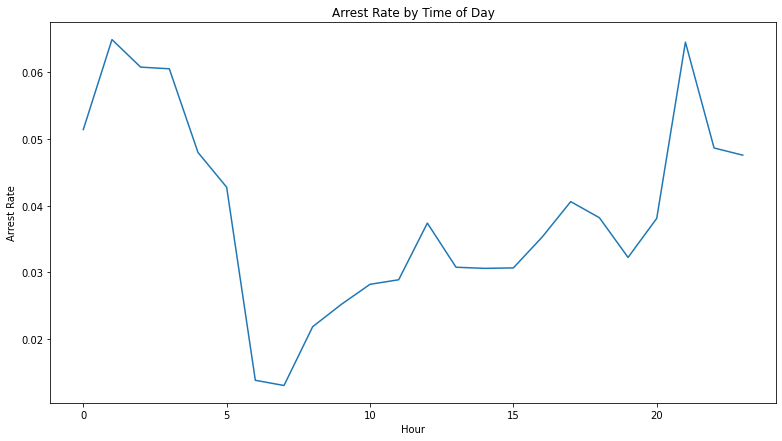

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

ri = pd.read_csv('police.csv')
ri.drop(['county_name', 'state'], axis='columns', inplace=True)
ri.dropna(subset=['driver_gender'], inplace=True)
ri['is_arrested'] = ri['is_arrested'].astype('bool')
combined = ri['stop_date'].str.cat(ri['stop_time'], sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)
ri.set_index('stop_datetime', inplace=True)
ri['frisk'] = ri['search_type'].str.contains('Protective Frisk', na=False)
hourly_arrest_rate = ri.groupby(ri.index.hour)['is_arrested'].mean()

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot(figsize=(13, 7))

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')
plt.show()

The arrest rate has a significant spike overnight, and then dips in the early morning hours.

# ***Resampling the time series***



In [ ]:
df['col'].resample('M').mean()

### ***Plotting drug-related stops***

In a small portion of traffic stops, drugs are found in the vehicle during a search. In this exercise, you'll assess whether these drug-related stops are becoming more common over time.

The `Boolean` column `drugs_related_stop` indicates whether drugs were found during a given stop. You'll calculate the annual drug rate by resampling this column, and then you'll use a line plot to visualize how the rate has changed over time.

* Calculate the annual rate of drug-related stops by resampling the `drugs_related_stop` column (on the `'A'` frequency) and taking the `mean`.
* Save the annual drug rate Series as a new object, `annual_drug_rate`.
* Create a line plot of `annual_drug_rate` using the `.plot()` method.


stop_datetime
2005-12-31   0.01
2006-12-31   0.01
2007-12-31   0.01
2008-12-31   0.01
2009-12-31   0.01
2010-12-31   0.01
2011-12-31   0.01
2012-12-31   0.01
2013-12-31   0.01
2014-12-31   0.01
2015-12-31   0.01
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


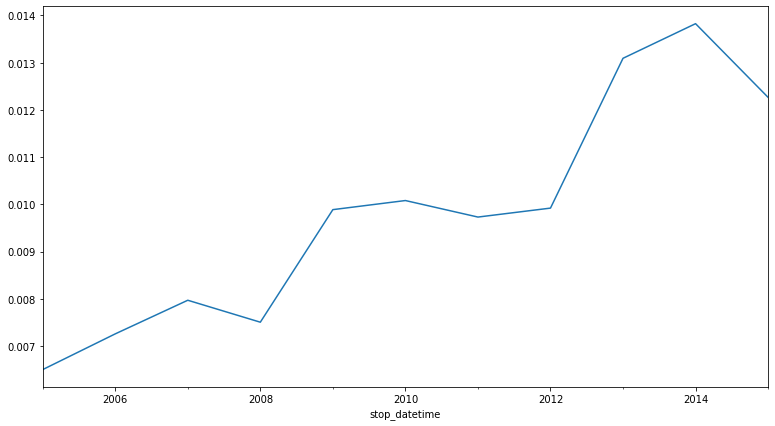

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

ri = pd.read_csv('police.csv')
ri.drop(['county_name', 'state'], axis='columns', inplace=True)
ri.dropna(subset=['driver_gender'], inplace=True)
ri['is_arrested'] = ri['is_arrested'].astype('bool')
combined = ri['stop_date'].str.cat(ri['stop_time'], sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)
ri.set_index('stop_datetime', inplace=True)
ri['frisk'] = ri['search_type'].str.contains('Protective Frisk', na=False)
hourly_arrest_rate = ri.groupby(ri.index.hour)['is_arrested'].mean()

# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())

# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot(figsize=(13,7))
plt.show()

### ***Comparing drug and search rates***

As you saw in the last exercise, the rate of drug-related stops increased significantly between 2005 and 2015. You might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

You can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then you'll see both rates increasing over time.

* Calculate the annual search rate by resampling the `search_conducted` column, and save the result as `annual_search_rate`.
* Concatenate `annual_drug_rate` and `annual_search_rate` along the `columns` axis, and save the result as `annual`.
* Create `subplots` of the drug and search rates from the annual DataFrame.


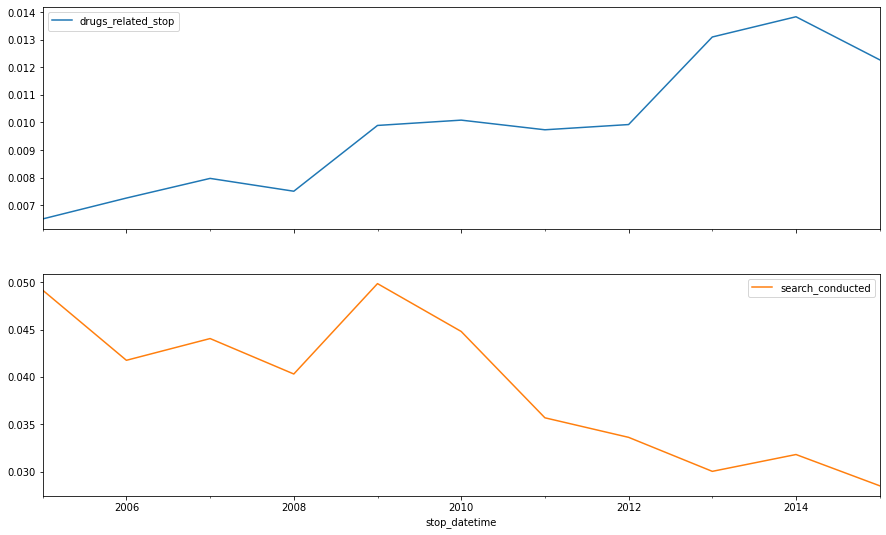

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

ri = pd.read_csv('police.csv')
ri.drop(['county_name', 'state'], axis='columns', inplace=True)
ri.dropna(subset=['driver_gender'], inplace=True)
ri['is_arrested'] = ri['is_arrested'].astype('bool')
combined = ri['stop_date'].str.cat(ri['stop_time'], sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)
ri.set_index('stop_datetime', inplace=True)
ri['frisk'] = ri['search_type'].str.contains('Protective Frisk', na=False)
hourly_arrest_rate = ri.groupby(ri.index.hour)['is_arrested'].mean()
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

# Create subplots from 'annual'
annual.plot(subplots=True, figsize=(15, 9))

# Display the subplots
plt.show()

The rate of drug-related stops increased even though the search rate decreased, disproving our hypothesis.

# ***Computing a frequency table***

* **`Frequency table`**: Tally of how many times each combination of values
occurs

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

ri = pd.read_csv('police.csv')
ri.drop(['county_name', 'state'], axis='columns', inplace=True)
ri.dropna(subset=['driver_gender'], inplace=True)
ri['is_arrested'] = ri['is_arrested'].astype('bool')
combined = ri['stop_date'].str.cat(ri['stop_time'], sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)
ri.set_index('stop_datetime', inplace=True)
ri['frisk'] = ri['search_type'].str.contains('Protective Frisk', na=False)
hourly_arrest_rate = ri.groupby(ri.index.hour)['is_arrested'].mean()
annual_drug_rate = ri['drugs_related_stop'].resample('A').mean()
annual_search_rate = ri['search_conducted'].resample('A').mean()
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

print(ri[(ri['driver_race'] == 'Asian') & (ri['driver_gender'] == 'F')].shape)
table = pd.crosstab(ri['driver_race'], ri['driver_gender'])
table

(551, 14)


driver_gender,F,M
driver_race,,
Asian,551,1838
Black,2681,9604
Hispanic,1953,7774
Other,53,212
White,18536,43334


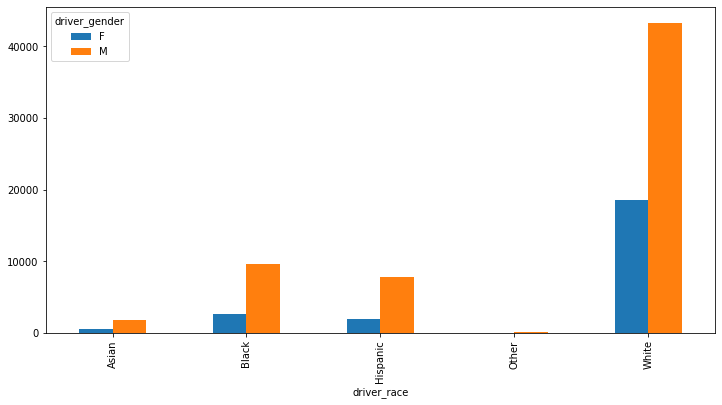

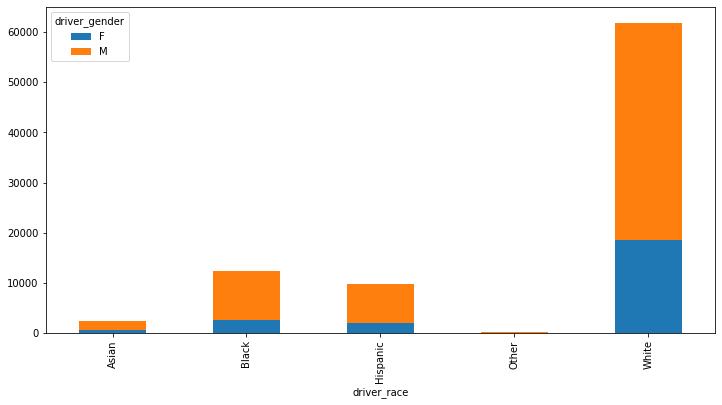

In [6]:
table.plot(kind='bar', figsize=(12,6))
table.plot(kind='bar', figsize=(12,6), stacked=True)
plt.show()

### ***Tallying violations by district***

The state of Rhode Island is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police?

In this exercise, you'll create a frequency table to determine how many violations of each type took place in each of the six zones. Then, you'll filter the table to focus on the "K" zones, which you'll examine further in the next exercise.

* Create a frequency table from the `ri` DataFrame's `district` and `violation` columns using the **`pd.crosstab()`** function.
* Save the frequency table as a new object, `all_zones`.
* Select rows `'Zone K1'` through `'Zone K3'` from `all_zones` using the **`.loc[]`** accessor.
* Save the smaller table as a new object, `k_zones`.

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

ri = pd.read_csv('police.csv')
ri.drop(['county_name', 'state'], axis='columns', inplace=True)
ri.dropna(subset=['driver_gender'], inplace=True)
ri['is_arrested'] = ri['is_arrested'].astype('bool')
combined = ri['stop_date'].str.cat(ri['stop_time'], sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)
ri.set_index('stop_datetime', inplace=True)
ri['frisk'] = ri['search_type'].str.contains('Protective Frisk', na=False)
hourly_arrest_rate = ri.groupby(ri.index.hour)['is_arrested'].mean()
annual_drug_rate = ri['drugs_related_stop'].resample('A').mean()
annual_search_rate = ri['search_conducted'].resample('A').mean()
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

# Create a frequency table of districts and violations
display(pd.crosstab(ri['district'], ri['violation']))

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri['district'], ri['violation'])

# Select rows 'Zone K1' through 'Zone K3'
display(all_zones.loc['Zone K1':'Zone K3'])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322
Zone X1,296,671,143,38,74,1119
Zone X3,2049,3086,769,671,820,8779
Zone X4,3541,5353,1560,1411,843,9795


violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322


### ***Plotting violations by district***

Now that you've created a frequency table focused on the "K" zones, you'll visualize the data to help you compare what violations are being caught in each zone.

First you'll create a `bar` plot, which is an appropriate plot type since you're comparing categorical data. Then you'll create a stacked bar plot in order to get a slightly different look at the data. Which plot do you find to be more insightful?

* Create a bar plot of `k_zones`.
* Display the plot and examine it. What do you notice about each of the zones?
* Create a stacked bar plot of `k_zones`.
* Display the plot and examine it. Do you notice anything different about the data than you did previously?

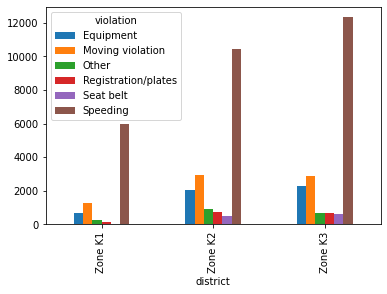

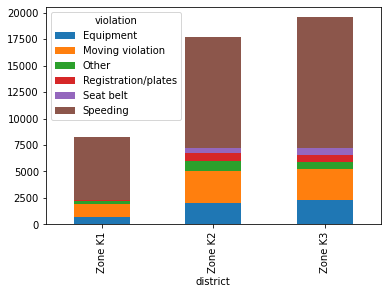

In [10]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar')

# Display the plot
plt.show()

# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind='bar', stacked=True)

# Display the plot
plt.show()



The vast majority of traffic stops in Zone K1 are for speeding, and Zones K2 and K3 are remarkably similar to one another in terms of violations.

# ***Mapping one set of values to another***

* Dictionary maps the values you have to the values you want



In [ ]:
mapping = {'string1':val_1, 'string2':val_2}
df['new_col'] = df['old_col'].map(mapping)

### ***Converting stop durations to numbers***

In the traffic stops dataset, the `stop_duration` column tells you approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as strings, such as `'0-15 Min'`. How can you make this data easier to analyze?

In this exercise, you'll convert the stop durations to integers. Because the precise durations are not available, you'll have to estimate the numbers using reasonable values:

* Convert `'0-15 Min'` to `8`
* Convert `'16-30 Min'` to `23`
* Convert `'30+ Min'` to `45`

* Print the unique values in the `stop_duration` column. 
* Create a dictionary called `mapping` that maps the `stop_duration` strings to the specified integers.
* Convert the `stop_duration` strings to integers using the `mapping`, and store the results in a new column called `stop_minutes`.
* Print the unique values in the `stop_minutes` column, to verify that the durations were properly converted to integers.

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

ri = pd.read_csv('police.csv')
ri.drop(['county_name', 'state'], axis='columns', inplace=True)
ri.dropna(subset=['driver_gender'], inplace=True)
ri['is_arrested'] = ri['is_arrested'].astype('bool')
combined = ri['stop_date'].str.cat(ri['stop_time'], sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)
ri.set_index('stop_datetime', inplace=True)
ri['frisk'] = ri['search_type'].str.contains('Protective Frisk', na=False)
hourly_arrest_rate = ri.groupby(ri.index.hour)['is_arrested'].mean()
annual_drug_rate = ri['drugs_related_stop'].resample('A').mean()
annual_search_rate = ri['search_conducted'].resample('A').mean()
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')
all_zones = pd.crosstab(ri['district'], ri['violation'])
k_zones = all_zones.loc['Zone K1':'Zone K3']

# Print the unique values in 'stop_duration'
print(ri['stop_duration'].unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min': 8, '16-30 Min': 23, '30+ Min': 45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(ri['stop_minutes'].unique())

['0-15 Min' '16-30 Min' '30+ Min']
[ 8 23 45]


### ***Plotting stop length***


If you were stopped for a particular violation, how long might you expect to be detained?

In this exercise, you'll visualize the average length of time drivers are stopped for each type of violation. Rather than using the violation column in this exercise, you'll use `violation_raw` since it contains more detailed descriptions of the violations.

* For each value in the `ri` DataFrame's `violation_raw` column, calculate the mean number of `stop_minutes` that a driver is detained.
* Save the resulting Series as a new object, `stop_length`.
* Sort `stop_length` by its values, and then visualize it using a horizontal `bar` plot.


violation_raw
APB                                17.97
Call for Service                   22.12
Equipment/Inspection Violation     11.45
Motorist Assist/Courtesy           17.74
Other Traffic Violation            13.84
Registration Violation             13.74
Seatbelt Violation                  9.66
Special Detail/Directed Patrol     15.12
Speeding                           10.58
Suspicious Person                  14.91
Violation of City/Town Ordinance   13.25
Warrant                            24.06
Name: stop_minutes, dtype: float64


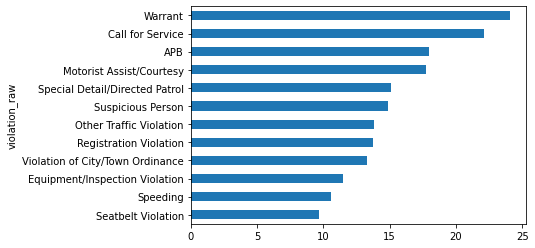

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

ri = pd.read_csv('police.csv')
ri.drop(['county_name', 'state'], axis='columns', inplace=True)
ri.dropna(subset=['driver_gender'], inplace=True)
ri['is_arrested'] = ri['is_arrested'].astype('bool')
combined = ri['stop_date'].str.cat(ri['stop_time'], sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)
ri.set_index('stop_datetime', inplace=True)
ri['frisk'] = ri['search_type'].str.contains('Protective Frisk', na=False)
hourly_arrest_rate = ri.groupby(ri.index.hour)['is_arrested'].mean()
annual_drug_rate = ri['drugs_related_stop'].resample('A').mean()
annual_search_rate = ri['search_conducted'].resample('A').mean()
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')
all_zones = pd.crosstab(ri['district'], ri['violation'])
k_zones = all_zones.loc['Zone K1':'Zone K3']
mapping = {'0-15 Min': 8, '16-30 Min': 23, '30+ Min': 45}
ri['stop_minutes'] = ri.stop_duration.map(mapping)

# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby('violation_raw')['stop_minutes'].mean())

# Save the resulting Series as 'stop_length'
stop_length = ri.groupby('violation_raw')['stop_minutes'].mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')

# Display the plot
plt.show()

### ***Plotting the temperature***

In this exercise, you'll examine the temperature columns from the weather dataset to assess whether the data seems trustworthy. First you'll print the summary statistics, and then you'll visualize the data using a `box` plot.

When deciding whether the values seem reasonable, keep in mind that the temperature is measured in degrees Fahrenheit, not Celsius!

* Read `weather.csv` into a DataFrame named `weather`.
* Select the temperature columns (`TMIN`, `TAVG`, `TMAX`) and print their summary statistics using the **`.describe()`** method.
* Create a `box` plot to visualize the temperature columns.

          TMIN     TAVG     TMAX
count 4,017.00 1,217.00 4,017.00
mean     43.48    52.49    61.27
std      17.02    17.83    18.20
min      -5.00     6.00    15.00
25%      30.00    39.00    47.00
50%      44.00    54.00    62.00
75%      58.00    68.00    77.00
max      77.00    86.00   102.00


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


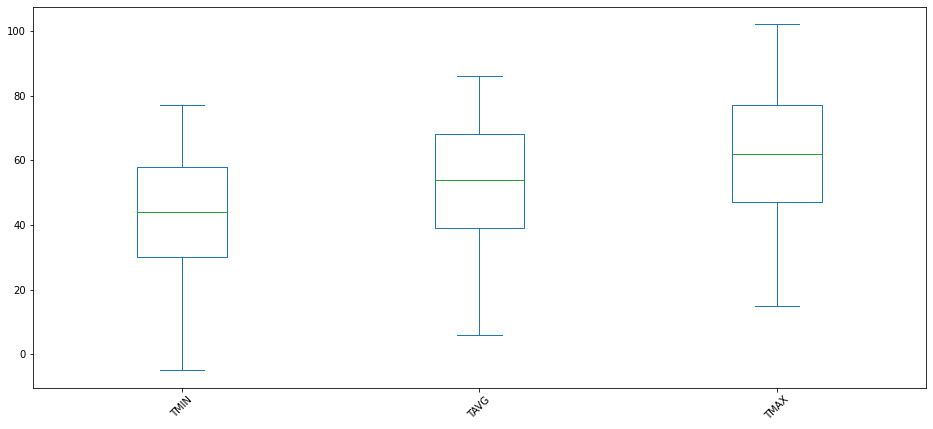

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

weather = pd.read_csv('weather.csv')

# Describe the temperature columns
print(weather[['TMIN', 'TAVG', 'TMAX']].describe())

# Create a box plot of the temperature columns
weather[['TMIN', 'TAVG', 'TMAX']].plot(kind='box', figsize=(16,7))
plt.xticks(rotation=45)
plt.show()

The temperature data looks good so far: the `TAVG` values are in between `TMIN` and `TMAX`, and the measurements and ranges seem reasonable.

### ***Plotting the temperature difference***

In this exercise, you'll continue to assess whether the dataset seems trustworthy by plotting the difference between the maximum and minimum temperatures.

What do you notice about the resulting histogram? Does it match your expectations, or do you see anything unusual?

* Create a new column in the `weather` DataFrame named `TDIFF` that represents the difference between the maximum and minimum temperatures.
* Print the summary statistics for `TDIFF` using the **`.describe()`** method.
* Create a histogram with `20` bins to visualize `TDIFF`.


count   4,017.00
mean       17.78
std         6.35
min         2.00
25%        14.00
50%        18.00
75%        22.00
max        43.00
Name: TDIFF, dtype: float64


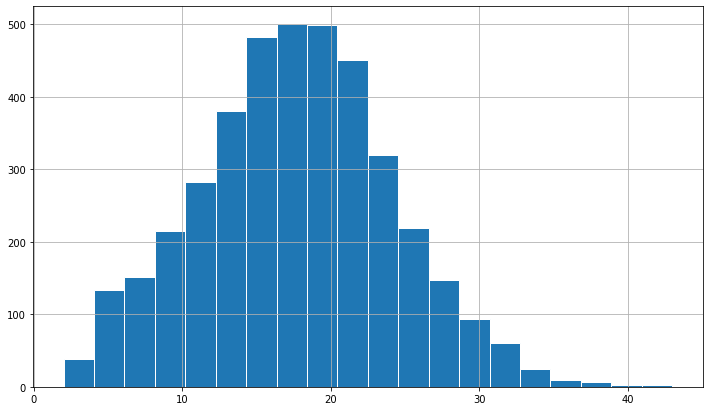

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

weather = pd.read_csv('weather.csv')

# Create a 'TDIFF' column that represents temperature difference
weather['TDIFF'] = weather['TMAX'] - weather['TMIN']

# Describe the 'TDIFF' column
print(weather['TDIFF'].describe())

# Create a histogram with 20 bins to visualize 'TDIFF'
weather['TDIFF'].hist(bins=20, edgecolor='white', figsize=(12,7))

# Display the plot
plt.show()

`TDIFF` column has no negative values and its distribution is approximately normal, both of which are signs that the data is trustworthy.

### ***Counting bad weather conditions***

The `weather` DataFrame contains `20` columns that start with `'WT'`, each of which represents a bad weather condition. For example:

* `WT05` indicates "Hail"
* `WT11` indicates "High or damaging winds"
* `WT17` indicates "Freezing rain"

For every row in the dataset, each `WT` column contains either a `1` (meaning the condition was present that day) or `NaN` (meaning the condition was not present).

In this exercise, you'll quantify "how bad" the weather was each day by counting the number of `1` values in each row.

* Copy the columns `WT01` through `WT22` from `weather` to a new DataFrame named `WT`.
* Calculate the sum of each row in `WT`, and store the results in a new weather column named `bad_conditions`.
* Replace any missing values in `bad_conditions` with a `0`. 
* Create a histogram to visualize `bad_conditions`.

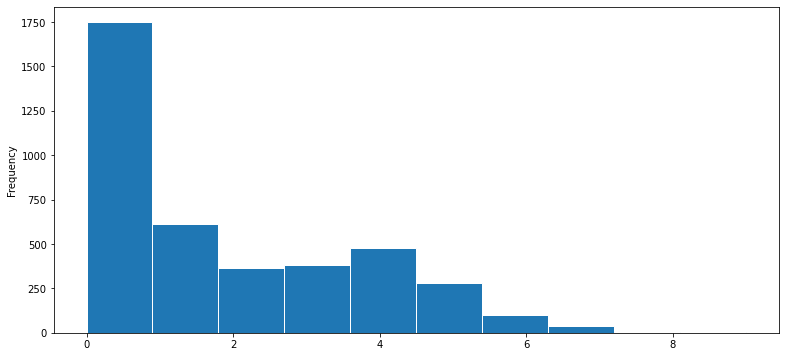

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

weather = pd.read_csv('weather.csv')
weather['TDIFF'] = weather['TMAX'] - weather['TMIN']

# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:, 'WT01':'WT22']

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis='columns')

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'
weather['bad_conditions'].plot(kind='hist', figsize=(13,6), edgecolor='white')

# Display the plot
plt.show()

It looks like many days didn't have any bad weather conditions, and only a small portion of days had more than four bad weather conditions.

### ***Rating the weather conditions***

In the previous exercise, you counted the number of bad weather conditions each day. In this exercise, you'll use the counts to create a rating system for the weather.

The counts range from `0` to `9`, and should be converted to ratings as follows:

  * Convert `0` to `'good'`
  * Convert `1` through `4` to `'bad'`
  * Convert `5` through `9` to `'worse'`

* Count the unique values in the `bad_conditions` column and sort the index. 
* Create a dictionary called `mapping` that maps the `bad_conditions` integers to the specified strings.
* Convert the `bad_conditions` integers to strings using the `mapping` and store the results in a new column called `rating`.
* Count the unique values in `rating` to verify that the integers were properly converted to strings.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

weather = pd.read_csv('weather.csv')
weather['TDIFF'] = weather['TMAX'] - weather['TMIN']
WT = weather.loc[:, 'WT01':'WT22']
weather['bad_conditions'] = WT.sum(axis='columns')
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Count the unique values in 'bad_conditions' and sort the index
print(weather['bad_conditions'].value_counts().sort_index())

# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather['bad_conditions'].map(mapping)

# Count the unique values in 'rating'
print(weather['rating'].value_counts())

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64
bad      1836
good     1749
worse     432
Name: rating, dtype: int64


This rating system should make the weather condition data easier to understand.

# ***Changing the data type to category***

Since the rating column only has a few possible values, you'll change its data type to `category` in order to store the data more efficiently. You'll also specify a logical order for the categories, which will be useful for future exercises.

* Create a list object called `cats` that lists the `weather` ratings in a logical order: `'good'`, `'bad'`, `'worse'`.
* Change the data type of the rating column from `object` to `category`. Make sure to use the `cats` list to define the category ordering.
* Examine the head of the `rating` column to confirm that the categories are logically ordered.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

weather = pd.read_csv('weather.csv')
weather['TDIFF'] = weather['TMAX'] - weather['TMIN']
WT = weather.loc[:, 'WT01':'WT22']
weather['bad_conditions'] = WT.sum(axis='columns')
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}
weather['rating'] = weather['bad_conditions'].map(mapping)

# Create a list of weather ratings in logical order
cats = ['good', 'bad', 'worse']

# Change the data type of 'rating' to category
weather['rating'] = weather['rating'].astype('category')

# Examine the head of 'rating'
print(weather['rating'].head())

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): ['bad', 'good', 'worse']


### ***Preparing the DataFrames***

In this exercise, you'll prepare the traffic stop and weather rating DataFrames so that they're ready to be merged:

1. With the `ri` DataFrame, you'll move the `stop_datetime` index to a column since the index will be lost during the merge.
2. With the `weather` DataFrame, you'll select the `DATE` and `rating` columns and put them in a new DataFrame.

* Reset the index of the `ri` DataFrame.
* Examine the head of `ri` to verify that `stop_datetime` is now a DataFrame column, and the index is now the default integer index.
* Create a new DataFrame named `weather_rating` that contains only the `DATE` and `rating` columns from the `weather` DataFrame.
* Examine the head of `weather_rating` to verify that it contains the proper columns.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

weather = pd.read_csv('weather.csv')
weather['TDIFF'] = weather['TMAX'] - weather['TMIN']
WT = weather.loc[:, 'WT01':'WT22']
weather['bad_conditions'] = WT.sum(axis='columns')
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}
weather['rating'] = weather['bad_conditions'].map(mapping)
cats = ['good', 'bad', 'worse']
weather['rating'] = weather['rating'].astype('category')

# Reset the index of 'ri'
ri.reset_index(inplace=True)

# Examine the head of 'ri'
print(ri.head())

# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[['DATE', 'rating']]

# Examine the head of 'weather_rating'
print(weather_rating.head())

        stop_datetime   stop_date stop_time  ... district  frisk stop_minutes
0 2005-01-04 12:55:00  2005-01-04     12:55  ...  Zone X4  False            8
1 2005-01-23 23:15:00  2005-01-23     23:15  ...  Zone K3  False            8
2 2005-02-17 04:15:00  2005-02-17     04:15  ...  Zone X4  False            8
3 2005-02-20 17:15:00  2005-02-20     17:15  ...  Zone X1  False           23
4 2005-02-24 01:20:00  2005-02-24     01:20  ...  Zone X3  False            8

[5 rows x 16 columns]
         DATE rating
0  2005-01-01    bad
1  2005-01-02    bad
2  2005-01-03    bad
3  2005-01-04    bad
4  2005-01-05    bad


# ***Merging the DataFrames***

In this exercise, you'll merge the `ri` and `weather_rating` DataFrames into a new DataFrame, `ri_weather`.

The DataFrames will be joined using the `stop_date` column from `ri` and the `DATE` column from `weather_rating`. Thankfully the date formatting matches exactly, which is not always the case!

Once the merge is complete, you'll set `stop_datetime` as the index, which is the column you saved in the previous exercise.

* Examine the shape of the `ri` DataFrame.
* Merge the `ri` and `weather_rating` DataFrames using a left join.
* Examine the shape of `ri_weather` to confirm that it has two more columns but the same number of rows as `ri`.
* Replace the index of `ri_weather` with the `stop_datetime` column.

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

ri = pd.read_csv('police.csv')
ri.drop(['county_name', 'state'], axis='columns', inplace=True)
ri.dropna(subset=['driver_gender'], inplace=True)
ri['is_arrested'] = ri['is_arrested'].astype('bool')
combined = ri['stop_date'].str.cat(ri['stop_time'], sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)
ri.set_index('stop_datetime', inplace=True)
ri['frisk'] = ri['search_type'].str.contains('Protective Frisk', na=False)
hourly_arrest_rate = ri.groupby(ri.index.hour)['is_arrested'].mean()
annual_drug_rate = ri['drugs_related_stop'].resample('A').mean()
annual_search_rate = ri['search_conducted'].resample('A').mean()
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')
all_zones = pd.crosstab(ri['district'], ri['violation'])
k_zones = all_zones.loc['Zone K1':'Zone K3']
mapping = {'0-15 Min': 8, '16-30 Min': 23, '30+ Min': 45}
ri['stop_minutes'] = ri.stop_duration.map(mapping)

weather = pd.read_csv('weather.csv')
weather['TDIFF'] = weather['TMAX'] - weather['TMIN']
WT = weather.loc[:, 'WT01':'WT22']
weather['bad_conditions'] = WT.sum(axis='columns')
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}
weather['rating'] = weather['bad_conditions'].map(mapping)
cats = ['good', 'bad', 'worse']
weather['rating'] = weather['rating'].astype('category')
weather_rating = weather[['DATE', 'rating']]


# ต้องมี เพราะเวลา merge แล้ว index หาย
ri.reset_index(inplace=True)


print(ri.shape)

# Merge 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

# Examine the shape of 'ri_weather'
print(ri_weather.shape)

# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('stop_datetime', inplace=True)
ri_weather.head()

(86536, 16)
(86536, 18)


,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,frisk,stop_minutes,DATE,rating
stop_datetime,,,,,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8,2005-01-04,bad
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False,8,2005-01-23,worse
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8,2005-02-17,good
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,False,23,2005-02-20,bad
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,False,8,2005-02-24,bad


# ***`pivot_table`***

In [41]:
ri.pivot_table(index='violation', columns='driver_gender', values='search_conducted')

driver_gender,F,M
violation,,
Equipment,0.04,0.07
Moving violation,0.04,0.06
Other,0.04,0.05
Registration/plates,0.05,0.11
Seat belt,0.02,0.04
Speeding,0.01,0.03


# ***`crosstab`***

In [44]:
pd.crosstab(index=ri['violation'], columns=ri['driver_gender'], values=ri['search_conducted'], aggfunc='mean')

driver_gender,F,M
violation,,
Equipment,0.04,0.07
Moving violation,0.04,0.06
Other,0.04,0.05
Registration/plates,0.05,0.11
Seat belt,0.02,0.04
Speeding,0.01,0.03


In [45]:
pd.crosstab(index=ri['violation'], columns=ri['driver_gender'])

driver_gender,F,M
violation,,
Equipment,2501,8420
Moving violation,3286,12938
Other,707,3702
Registration/plates,1056,2647
Seat belt,578,2278
Speeding,15646,32777


In [46]:
ri.pivot_table(index='violation', columns='driver_gender', values='search_conducted', aggfunc='count')

driver_gender,F,M
violation,,
Equipment,2501,8420
Moving violation,3286,12938
Other,707,3702
Registration/plates,1056,2647
Seat belt,578,2278
Speeding,15646,32777


### ***Comparing arrest rates by weather rating***

Do police officers arrest drivers more often when the weather is bad? Let's find out!

* First, you'll calculate the overall arrest rate.
* Then, you'll calculate the arrest rate for each of the weather ratings you previously assigned.
* Finally, you'll add violation type as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.

1. Calculate the overall arrest rate by taking the mean of the `is_arrested` Series.

2. Calculate the arrest rate for each weather rating using a **`.groupby()`**.

3. Calculate the arrest rate for each combination of violation and rating. How do the arrest rates differ by group?

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.float_format = '{:,.4f}'.format

ri = pd.read_csv('police.csv')
ri.drop(['county_name', 'state'], axis='columns', inplace=True)
ri.dropna(subset=['driver_gender'], inplace=True)
ri['is_arrested'] = ri['is_arrested'].astype('bool')
combined = ri['stop_date'].str.cat(ri['stop_time'], sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)
ri.set_index('stop_datetime', inplace=True)
ri['frisk'] = ri['search_type'].str.contains('Protective Frisk', na=False)
hourly_arrest_rate = ri.groupby(ri.index.hour)['is_arrested'].mean()
annual_drug_rate = ri['drugs_related_stop'].resample('A').mean()
annual_search_rate = ri['search_conducted'].resample('A').mean()
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')
all_zones = pd.crosstab(ri['district'], ri['violation'])
k_zones = all_zones.loc['Zone K1':'Zone K3']
mapping = {'0-15 Min': 8, '16-30 Min': 23, '30+ Min': 45}
ri['stop_minutes'] = ri.stop_duration.map(mapping)

weather = pd.read_csv('weather.csv')
weather['TDIFF'] = weather['TMAX'] - weather['TMIN']
WT = weather.loc[:, 'WT01':'WT22']
weather['bad_conditions'] = WT.sum(axis='columns')
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}
weather['rating'] = weather['bad_conditions'].map(mapping)
cats = ['good', 'bad', 'worse']
weather['rating'] = weather['rating'].astype('category')
weather_rating = weather[['DATE', 'rating']]
# ต้องมี เพราะเวลา merge แล้ว index หาย
ri.reset_index(inplace=True)
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')
ri_weather.set_index('stop_datetime', inplace=True)

# Calculate the overall arrest rate
print(ri_weather['is_arrested'].mean())

# Calculate the arrest rate for each 'rating'
print(ri_weather.groupby('rating')['is_arrested'].mean())

# Calculate the arrest rate for each 'violation' and 'rating'
print(ri_weather.groupby(['violation', 'rating'])['is_arrested'].mean())

0.0355690117407784
rating
bad     0.0363
good    0.0337
worse   0.0417
Name: is_arrested, dtype: float64
violation            rating
Equipment            bad      0.0663
                     good     0.0590
                     worse    0.0974
Moving violation     bad      0.0580
                     good     0.0562
                     worse    0.0659
Other                bad      0.0874
                     good     0.0770
                     worse    0.0629
Registration/plates  bad      0.0982
                     good     0.0816
                     worse    0.1156
Seat belt            bad      0.0225
                     good     0.0286
                     worse    0.0000
Speeding             bad      0.0133
                     good     0.0134
                     worse    0.0169
Name: is_arrested, dtype: float64


The arrest rate increases as the weather gets worse, and that trend persists across many of the violation types. This doesn't prove a causal link, but it's quite an interesting result!

### ***Selecting from a multi-indexed Series***

The output of a single **`.groupby()`** operation on multiple columns is a Series with a `MultiIndex`. Working with this type of object is similar to working with a DataFrame:

* The outer index level is like the DataFrame rows.
* The inner index level is like the DataFrame columns.

In this exercise, you'll practice accessing data from a multi-indexed Series using the **`.loc[]`** accessor.

* Save the output of the **`.groupby()`** operation from the last exercise as a new object, `arrest_rate`.
* Print the `arrest_rate` Series and examine it.
* Print the arrest rate for moving violations in bad weather.
* Print the arrest rates for speeding violations in all three weather conditions.

In [52]:
# Save the output of the groupby operation from the last exercise
arrest_rate = ri_weather.groupby(['violation', 'rating'])['is_arrested'].mean()

# Print the 'arrest_rate' Series
print(arrest_rate)

# Print the arrest rate for moving violations in bad weather
print(arrest_rate.loc[('Moving violation', 'bad')])

# Print the arrest rates for speeding violations in all three weather conditions
print(arrest_rate.loc['Speeding'])

violation            rating
Equipment            bad      0.0663
                     good     0.0590
                     worse    0.0974
Moving violation     bad      0.0580
                     good     0.0562
                     worse    0.0659
Other                bad      0.0874
                     good     0.0770
                     worse    0.0629
Registration/plates  bad      0.0982
                     good     0.0816
                     worse    0.1156
Seat belt            bad      0.0225
                     good     0.0286
                     worse    0.0000
Speeding             bad      0.0133
                     good     0.0134
                     worse    0.0169
Name: is_arrested, dtype: float64
0.05804964058049641
rating
bad     0.0133
good    0.0134
worse   0.0169
Name: is_arrested, dtype: float64


### ***Reshaping the arrest rate data***

In this exercise, you'll start by reshaping the `arrest_rate` Series into a DataFrame. This is a useful step when working with any multi-indexed Series, since it enables you to access the full range of DataFrame methods.

Then, you'll create the exact same DataFrame using a pivot table. This is a great example of how pandas often gives you more than one way to reach the same result!

* Unstack the `arrest_rate` Series to reshape it into a DataFrame.
* Create the exact same DataFrame using a pivot table! Each of the three **`.pivot_table()`** parameters should be specified as one of the `ri_weather` columns.

In [53]:
# Unstack the 'arrest_rate' Series into a DataFrame
print(arrest_rate.unstack())

# Create the same DataFrame using a pivot table
print(ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested'))

rating                 bad   good  worse
violation                               
Equipment           0.0663 0.0590 0.0974
Moving violation    0.0580 0.0562 0.0659
Other               0.0874 0.0770 0.0629
Registration/plates 0.0982 0.0816 0.1156
Seat belt           0.0225 0.0286 0.0000
Speeding            0.0133 0.0134 0.0169
rating                 bad   good  worse
violation                               
Equipment           0.0663 0.0590 0.0974
Moving violation    0.0580 0.0562 0.0659
Other               0.0874 0.0770 0.0629
Registration/plates 0.0982 0.0816 0.1156
Seat belt           0.0225 0.0286 0.0000
Speeding            0.0133 0.0134 0.0169
